## Iris Data Visualisation

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [190]:
df.shape

(150, 6)

In [191]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [192]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


##### There are many types of plots available in seaborn: -


#### 1. Distribution Plots 

#### a. Distplot or Histplot - Univariate analysis

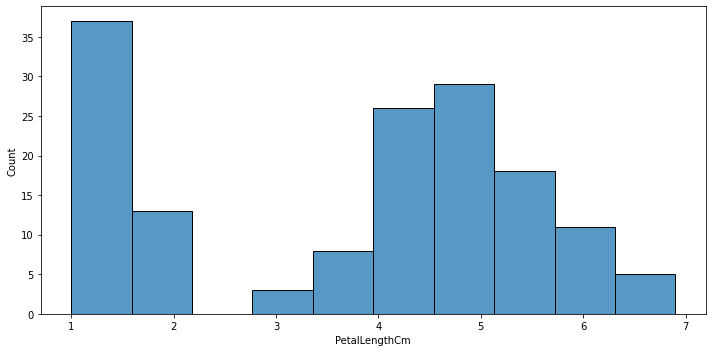

In [193]:
sns.histplot(df["PetalLengthCm"],bins=10)
plt.show()

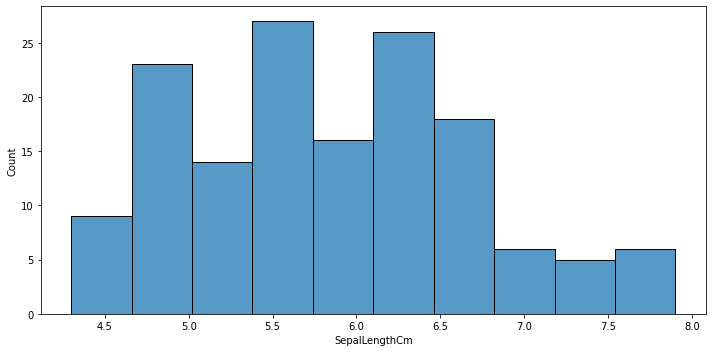

In [194]:
sns.histplot(df["SepalLengthCm"],bins=10)
plt.show()

#### b. Joint-Plot - 2 variables

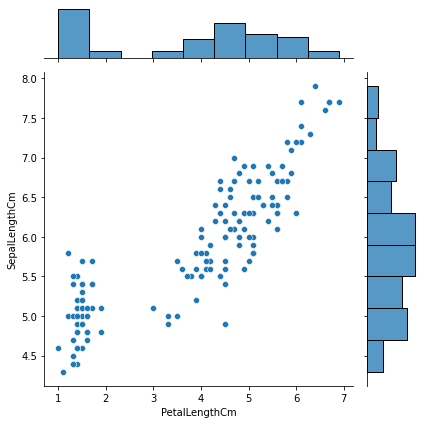

In [195]:
sns.jointplot(x=df["PetalLengthCm"],y=df["SepalLengthCm"],kind="scatter")

#### To plot side by side

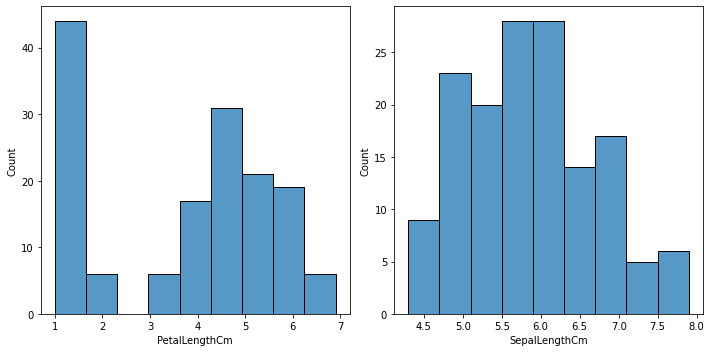

In [196]:
plt.rcParams["figure.figsize"]=[10.00,5.00]
plt.rcParams["figure.autolayout"]=True
fig,axes=plt.subplots(nrows=1,ncols=2)
sns.histplot(df["PetalLengthCm"],ax=axes[0])
sns.histplot(df["SepalLengthCm"],ax=axes[1])
plt.show()

#### c. Pairplot -  To plot the entire dataframe

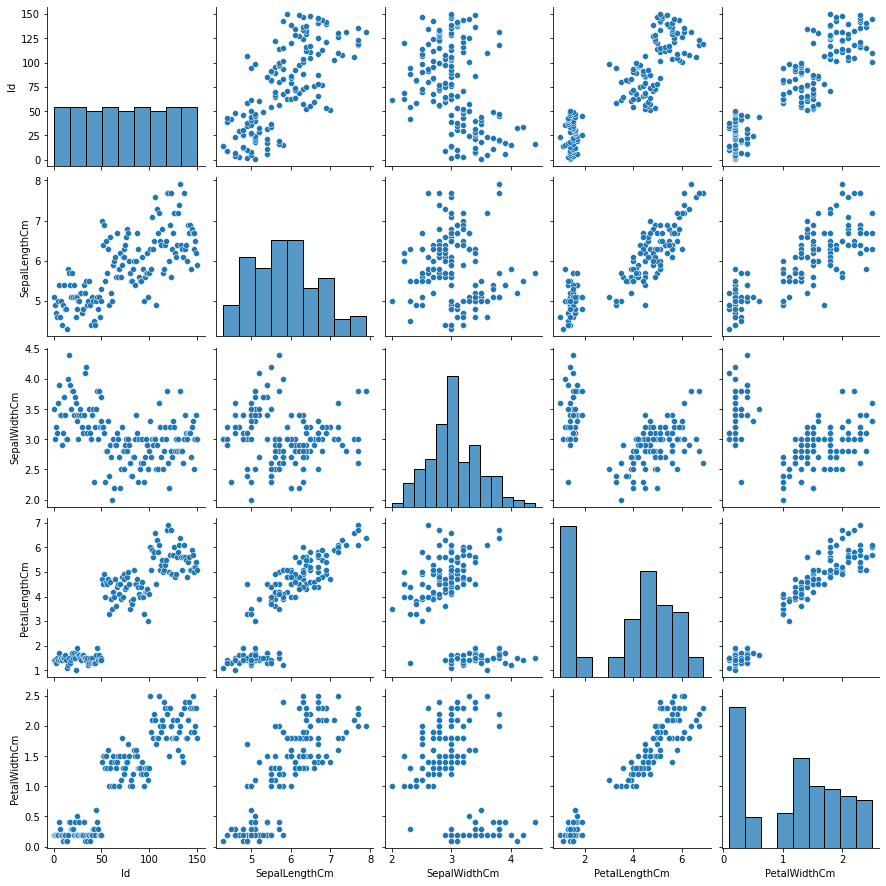

In [197]:
sns.pairplot(df)
plt.show()

### Categorical Plots

#### a. Bar Plot - To visualise 2 variables

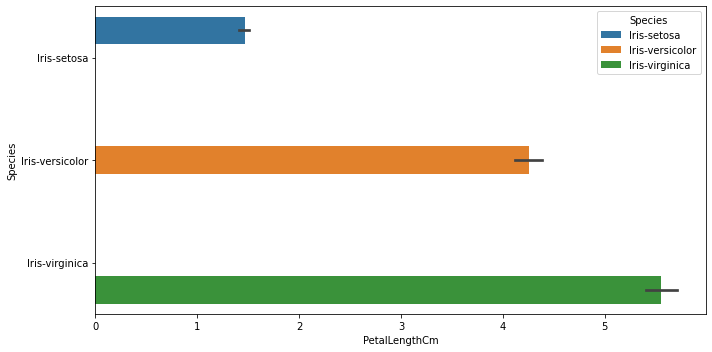

In [198]:
sns.barplot(x=df["PetalLengthCm"],y=df["Species"],hue=df["Species"])
plt.show()

#### d. Countplot - To count the number of occurences of each category

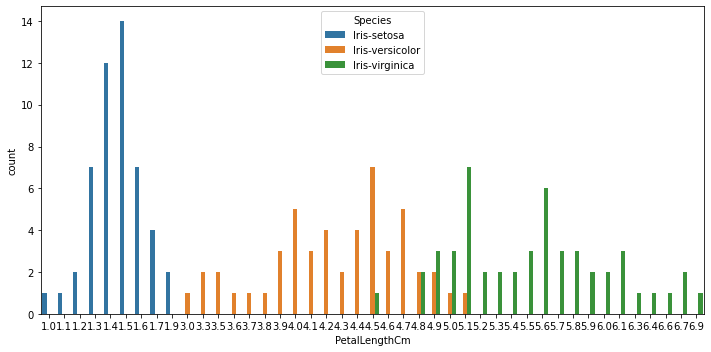

In [199]:
sns.countplot(x=df["PetalLengthCm"],hue=df["Species"])
plt.show()

#### c. Box Plot - Tells us about Max,Min,Mean,Median,First Quartile, Third Quartile and also about outliers

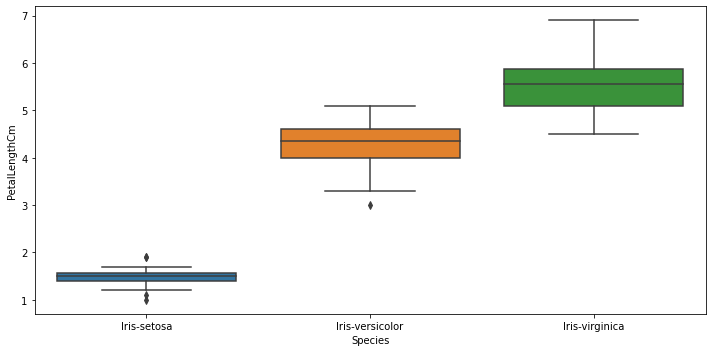

In [200]:
sns.boxplot(x=df["Species"],y=df["PetalLengthCm"])
plt.show()

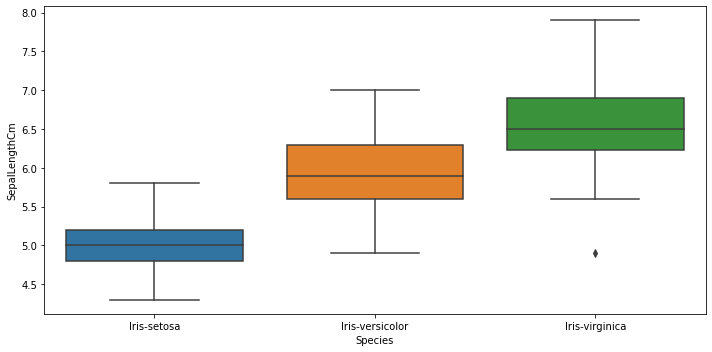

In [201]:
sns.boxplot(x=df["Species"],y=df["SepalLengthCm"])
plt.show()

#### d. Violin Plot - To compare the distribution of each variable

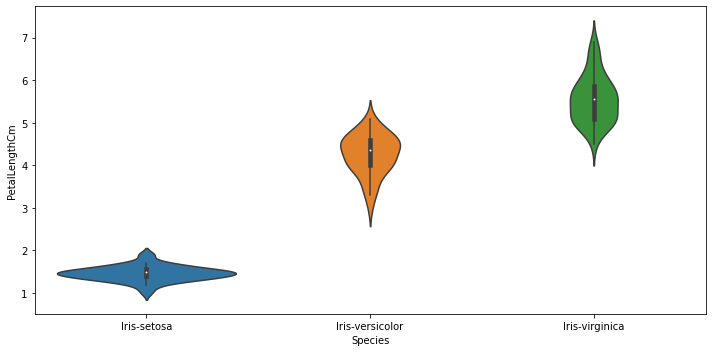

In [202]:
sns.violinplot(x=df["Species"],y=df["PetalLengthCm"])
plt.show()

In [203]:
X=df.drop_duplicates()

In [204]:
X=df.drop(["Species"],axis=1)

In [205]:
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [206]:
X = X.drop(["Id"],axis=1)

In [207]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [208]:
X.shape

(150, 4)

In [209]:
Y=df["Species"]
Y.replace({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2},inplace=True)

In [210]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [211]:
Y.shape

(150,)

In [229]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X.values,Y.values,test_size=0.3,random_state=0)

In [230]:
X_train.shape

(105, 4)

In [231]:
Y_train.shape

(105,)

In [232]:
X_test.shape

(45, 4)

In [233]:
Y_test.shape

(45,)

In [234]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [235]:
model.predict(X[0:10])

C:\Users\Yogiraj\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [236]:
Y_pred=model.predict(X_test)

In [237]:
df1=pd.DataFrame(Y_test)

In [238]:
df1["Predicted Species"]=Y_pred
df1.head()

,0,Predicted Species
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0


In [239]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
accuracy=accuracy_score(Y_test,Y_pred)
accuracy

0.9777777777777777

In [240]:
r2_score(Y_test,Y_pred)

0.9621848739495799

In [241]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
print(cm)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


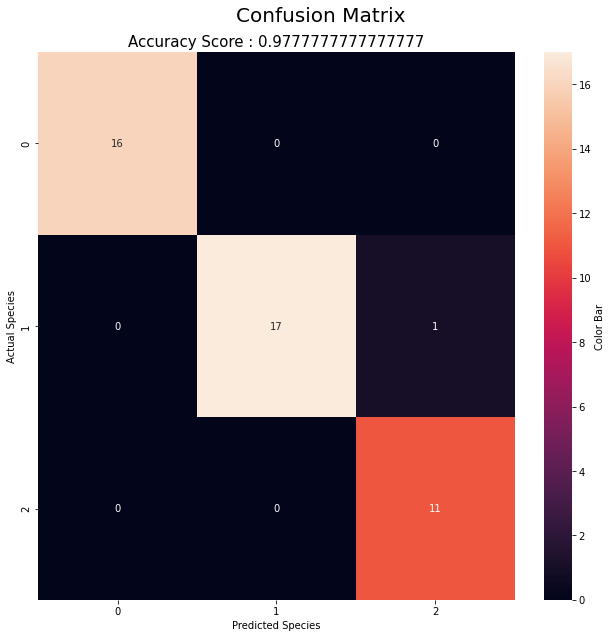

In [242]:
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt="d",cbar_kws={"orientation":"vertical","label":"Color Bar"})
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.suptitle("Confusion Matrix",size=20)
Accuracy = 'Accuracy Score : {0}'.format(accuracy)
plt.title(Accuracy,size=15)
plt.show()

### Saving the model

In [243]:
import pickle

iris = pickle.dump(model,open('iris.pkl','wb'))

In [244]:
ir = pickle.load(open('iris.pkl','rb'))

In [245]:
ir.predict([[5.1,3.5,1.4,0.2]])

array([0], dtype=int64)